In [1]:
from scipy.integrate import quad
from math import exp, sin, pi, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
# Aj = 10; Ai = 20
# omega = 7; phij = pi/3; phii=pi/4
# T = 2*pi/omega

def integrand_real(t, Aj, Ai, omega, phij, phii, m):
    return cos(Aj*sin(omega*t + phij)/omega 
                   - Ai*sin(omega*t + phii)/omega - m*omega*t)
def integrand_imag(t, Aj, Ai, omega, phij, phii, m):
    return sin(Aj*sin(omega*t + phij)/omega 
                   - Ai*sin(omega*t + phii)/omega - m*omega*t)

def F(Aj, Ai, omega, phij, phii, m):
    T = 2*pi/omega
    return (1/T)*(quad( integrand_real, 0, T, 
                       args=(Aj, Ai, omega, phij, phii, m))[0]
                       + 1j* quad( integrand_imag, 0, T, 
                       args=(Aj, Ai, omega, phij, phii, m))[0]  )



(0.4990613975498084+0j) (0.4990613975498084+0j)


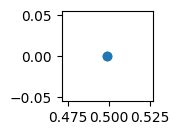

(0.4811520611126374-0.2885123052624667j) (-0.48115206111263764-0.2885123052624666j)


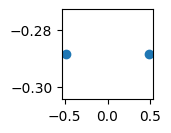

(0.11200218796750241-0.20972774840929326j) (0.11200218796750237+0.2097277484092934j)


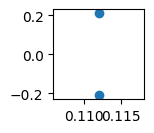

(-0.0031512502452660323-0.06342773187629101j) (0.0031512502452657846-0.0634277318762911j)


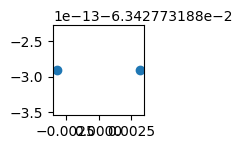

(-0.006928282856532532-0.010352336113892469j) (-0.006928282856532656+0.010352336113892082j)


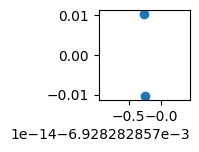

(-0.001749859465606107-0.0008256444532858562j) (0.001749859465606041-0.00082564445328583j)


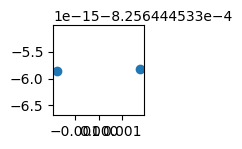

(-0.00024778417032226424+2.4682013312383414e-05j) (-0.0002477841703224904-2.4682013312290647e-05j)


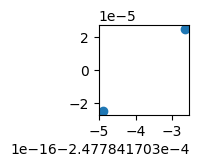

(-2.196365227240036e-05+1.633343146982424e-05j) (2.196365227314249e-05+1.633343146994793e-05j)


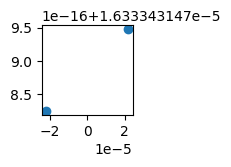

(-1.0014803153954703e-06+2.427932349210602e-06j) (-1.0014803149567635e-06-2.4279323489371353e-06j)


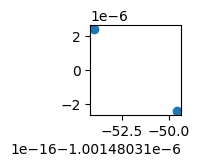

(3.3182894266797934e-08+2.2116623904697182e-07j) (-3.3182894684245734e-08+2.2116623867397448e-07j)


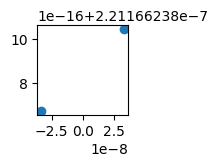

(1.0884545970135984e-08+1.3212996550178647e-08j) (1.0884546028114847e-08-1.3212996217283351e-08j)


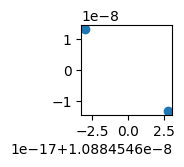

In [33]:
ms = np.array([int(i) for i in np.linspace(0, 10, 11)])
cmap = LinearSegmentedColormap.from_list('custom cmap', [ "#6A1B9A", "#D84315"], N=11)
cmaplist = [cmap(i) for i in range(11)]
colours = np.array
for m in ms:
    fig, ax = plt.subplots(figsize=(3/2.56, 3/2.56))
    results = np.array([F(Aj, Ai, omega, phij, phii, mm) for mm in [-m, m]])
    plt.scatter(np.real(results), np.imag(results))
    print(results[0], results[1])
    plt.show()


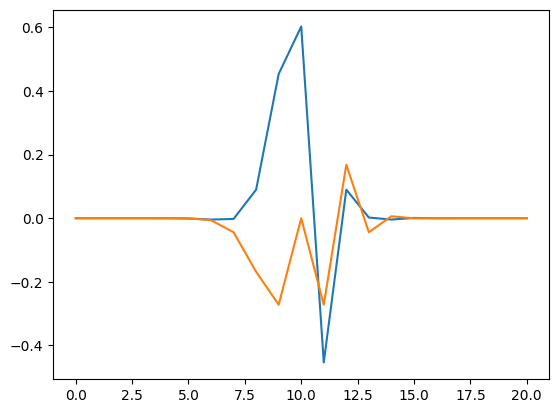

In [19]:
plt.plot(np.real(results))
plt.plot(np.imag(results))
plt.show()

## H_0

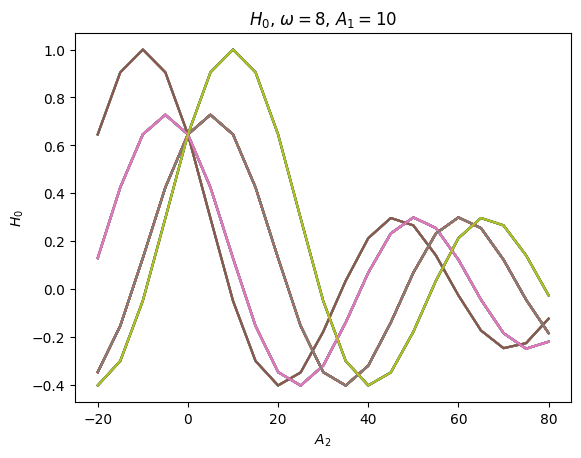

In [19]:
omega = 8
Ai = np.linspace(-20, 80, 21)
Aj = 10
phiis = np.linspace(0,2*pi, 7)
phijs = np.linspace(0, 2*pi, 7)
fig, ax = plt.subplots()
for phij in phijs:
    for phii in phiis:

        ax.plot(Ai, np.real(np.array([F(Aj, Aix, omega, phij, phii, 0) for Aix in Ai])), label=f"$\phi_1={phij},\phi_2={phii}$")
        # ax.plot(Ai, np.imag(np.array([F(Aj, Aix, omega, phij, phii, 0) for Aix in Ai])))
# plt.legend()
ax.set_title(r"$H_0$, $\omega=8$, $A_1=10$")
ax.set_ylabel(r"$H_0$")
ax.set_xlabel(r"$A_2$")
plt.show()

## NNN Tunnelling

In [25]:
A1 = 10
A2 = 20
A3 = 30
phi1 = pi/3
phi2 = pi/4
phi3 = pi/7
omega = 8
def NNN(A1, A2, A3, phi1, phi2, phi3):
    m = 0
    terms_still_big = 1
    NNN_tot = 0
    while terms_still_big ==1:
        m+=1
        NNN_m = (1/m)*(F(A1, A2, omega, phi1, phi2, m)*F(A2, A3, omega, phi2, phi3, -m) 
            - F(A1, A2, omega, phi1, phi2, -m)*F(A2, A3, omega, phi2, phi3, m))
        NNN_tot += NNN_m
        
        if np.real(NNN_m) <= 1e-5:
            if np.imag(NNN_m) <=1e-5:
                terms_still_big = 0
    return NNN_tot

print(NNN(A1, A2, A3, phi1, phi2, phi3))



-0.35484827201953567j
